<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/soluciones/03-Regression-SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal

En esta notebook exploraremos la regresión lineal, aplicándo este algoritmo a varios conjuntos de datos. Además, usaremos la regresión lineal multiple y polinomial.

Trabajaremos 4 ejemplos:

1. Regresión Lineal Simple
2. Regresión Lineal Multiple
3. Regresión con Regularización

* 🔽 Esta sección no forma parte del proceso usual de Machine Learning. Es una exploración didáctica de algún aspecto del funcionamiento del algoritmo.
* ⚡ Esta sección incluye técnicas más avanzadas destinadas a optimizar o profundizar en el uso de los algoritmos.
* ⭕ Esta sección contiene un ejercicio o práctica a realizar. Aún si no se establece una fecha de entrega, es muy recomendable realizarla para practicar conceptos clave de cada tema.

La **RL** es el modelo más simple para entender los problemas de regresión. Este tipo de modelos son muy populares debido a que:

  - Son *baratos* y *rápidos* de estimar.
  - Son **INTERPRETABLES**.

El caso base de una RL consiste en ajustar una linea a un conjunto de puntos (1 variable independiente, 1 variable dependiente). Este modelo se puede extender a comportamientos más complicados (más dimensiones o relaciones no lineales).

## Ejemplo 1: Regresión Lineal Simple

Una Regresión Lineal Simple, es una linea en 2D que es **ajustada** a datos y tiene la siguiente forma:

\begin{equation}
y=\beta_0+\beta_1x_1,
\end{equation}

tal que $y$ es la variable dependiente (etiqueta/salida) y $\mathbf{x}$ son las variable independiente (feature).

$\beta_0$ es la *ordenada al origen* (*intercepto*) y $\beta_1$ es la *pendiente* de la linea (*coeficiente*).

Generaremos datos sintéticos que provienen de una linea con $\beta_0=2$ y $\beta_1=5$. Este ejemplo será útil para desarrollar la intuición detrás del método.

In [ ]:
import numpy as np

np.random.seed(55) # Fijamos el 'seed', para la reproducibilidad.
size = 100

b0 = 2 # Intercepto (sesgo)
b1 = 5 # Coeficiente (pendiente)

x = np.random.uniform(0,3,size) # Tomamos 100 puntos sobre el [0,3]
y_recta = (b0 + (b1 * x))       # Coordenadas y sobre la recta
ruido = np.random.normal(0,1,size) # Ruido con distribución normal
y = y_recta + ruido             # Agregamos el ruido a las coordenadas en y

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.scatter(x,y_recta,color='black',alpha=0.7)
plt.subplot(1,2,2)
plt.scatter(x,y,color='red')
plt.show()

<iframe scrolling="no" title="Regresión Lineal" src="https://www.geogebra.org/material/iframe/id/sv32x27d/width/700/height/500/border/888888/sfsb/true/smb/false/stb/false/stbh/false/ai/false/asb/false/sri/false/rc/false/ld/false/sdz/true/ctl/false" width="700px" height="500px" style="border:0px;"> </iframe>

### 🔽 Detalles Matemáticos: Solución usando OLS

Para ejemplificar, volvamos a una variable independiente. El **ajuste óptimo** se puede determinar de varias formas, pero la manera más común (y la utilizada por `Scikit-Learn`) es mediante el **método de OLS**, el cual minimiza una cantidad denominada *suma de cuadrados de los residuos* (RSS):

\begin{align}
RSS(\hat{\beta_0},\hat{\beta_1}) &= \sum_{i=1}^n [y_i - (\hat{\beta_0}+\hat{\beta_1} x_i)]^2,\\
\end{align}

en esta ecuación el **residuo** corresponde al valor $e_i$, tal que $e_i=y_i - (\hat{\beta_0}+\hat{\beta_1} x_i)$. Geométricamente, un residuo es la distancia vertical entre la **linea ajustada** y el valor real $y_i$.

<img src="https://docs.google.com/uc?export=download&id=13gFpVnLx56mrQ1j4pGuZFlfXVl-EkoJK" width="600" align="middle">



In [ ]:
#@title
##@title Applet de geogebra

import IPython

iframe = '<iframe scrolling="no" title="Regresión Lineal" src="https://www.geogebra.org/material/iframe/id/sv32x27d/width/700/height/500/border/888888/sfsb/true/smb/false/stb/false/stbh/false/ai/false/asb/false/sri/false/rc/false/ld/false/sdz/true/ctl/false" width="700px" height="500px" style="border:0px;"> </iframe>'

IPython.display.HTML(iframe)

Otra precisión importante, es que OLS produce estimados de los parámetros, es decir que se obtienen $\hat{\beta_0}$ y $\hat{\beta_1}$, y no los verdaderos $\beta_0$ y $\beta_1$.

**Representación Algebraica**

Un modelo de regresión lineal para una sola variable independiente, lo podemos escribir como un sistema de ecuaciones lineales utilizando matrices de la siguiente forma:

$$
\begin{bmatrix}
y_1 \\ y_2 \\ \dots \\ y_n
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
1 & \dots \\
1 & x_{n}
\end{bmatrix}
\begin{bmatrix}
\hat{\beta}_0 \\
\hat{\beta}_1 \\
\end{bmatrix}
+
\begin{bmatrix}
e_0 \\
e_1 \\
\dots \\
e_n
\end{bmatrix}
=
X\hat{\beta}+\mathbf{e}
$$

La Estimación de $\hat{\beta}$ está dada por

$$
\hat{\beta} = (X^T X)^{-1} X^T\mathbf{y} $$

### 🔽 Implementación manual

Primero, añadimos el vector columna de 1s. Obtener la matriz

\begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
1 & \dots \\
1 & x_{n}
\end{bmatrix}

Acerca de la concatenación arreglos: https://stackoverflow.com/questions/33356442/when-should-i-use-hstack-vstack-vs-append-vs-concatenate-vs-column-stack

In [ ]:
X = np.column_stack((np.ones(shape=x.shape),x))

print(X[:5,:])

assert X.shape == (size,2)

Resolver usando mínimos cuadrados (OLS). Es decir,

$$\hat{\beta} = (X^T X)^{-1} X^T\mathbf{y}$$

In [ ]:
beta = (np.linalg.inv(np.transpose(X)@X)@np.transpose(X))@y
print(beta.shape)

beta_0 = beta[0]
beta_1 = beta[1]

print(beta_0,beta_1)

Visualicemos la línea ajustada

In [ ]:
x_values = np.linspace(0, 3, 100)       # Dividimos el intérvalo [0,3] en 100 puntos equi-espaciados
y_values = beta_0 + beta_1 * x_values

plt.figure()
plt.scatter(x, y, marker='x',color='red')
plt.plot(x_values, y_values, color='green')
plt.show()

### Implementación con `scikit-learn`

La regresión lineal se hace con la clase [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) de scikit-learn.

Primero, hagamos un reshape necesario

In [ ]:
x = x.reshape(-1,1)   # Hacemos un reshape: X of shape (n_samples, n_features)
print(f"n_samples: {x.shape[0]},\nn_features: {x.shape[1]}")
x.shape

Inicializamos la clase con el hiperparámetro `fit_intercept=True`

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(x,y)

Por convención, en Scikit-Learn todos los parámetros del modelo que se aprendieron durante el proceso `fit()` son nombrados con guiones bajos al final. En este modelo podemos recuperar los valores de $\beta_0$ (el intercepto) y $\beta_1$ (el coeficiente).

In [ ]:
lr.intercept_

In [ ]:
lr.coef_

Realizamos predicciones

In [ ]:
x_values = np.linspace(0, 3, 100)

beta_0 = lr.intercept_
beta_1 = lr.coef_

y_values = beta_0 + beta_1 * x_values

In [ ]:
plt.figure()
plt.scatter(x, y, marker='x',color='black')
plt.plot(x_values, y_values, color='blue')
plt.show()

### 🔽 Hipotésis de normalidad

### Suposiciones de la regresión lineal

La regresión lineal se basa en algunas suposiciones importantes para que sus resultados sean confiables. Entre ellas están:

- **Linealidad**: existe una relación lineal entre las variables explicativas (X) y la variable objetivo (y). En nuestro ejemplo, los datos fueron creados específicamente siguiendo esta propiedad.
- **Independencia**: las observaciones son independientes entre sí. Esto significa que el valor de una observación no afecta directamente a otra.
- **Normalidad de los residuos**: los errores o residuos (es decir, la diferencia entre los valores reales y los predichos por la recta) deben seguir una distribución aproximadamente normal.

Los residuos se definen como:

$$ e_i = y_i - \hat{y}_i $$

Y la suposición es que:

$$ e_i \sim N(0, \sigma^2) $$

Esto implica que los errores están centrados en cero (no hay sesgo sistemático) y su dispersión es constante (homocedasticidad).

---

Veamos nuestro caso:





In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Calcular residuos
residuos = y - y_values

# Ajustar distribución normal a los residuos
mu, sigma = residuos.mean(), residuos.std()

# Graficar
sns.histplot(residuos, kde=True, bins=20, stat='density', color='skyblue')
x = np.linspace(residuos.min(), residuos.max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', lw=2, label='Normal teórica')
plt.title('Distribución de los residuos vs Normal teórica')
plt.legend()
plt.show()

In [ ]:
from scipy.stats import shapiro

stat, p_valor = shapiro(residuos)
print(f'Estadístico: {stat:.4f}, p-valor: {p_valor:.4f}')

if p_valor > 0.05:
    print("No hay evidencia suficiente para rechazar la normalidad.")
else:
    print("Hay evidencia suficiente para rechazar la normalidad.")

#### ⚡ ¿Qué pasa si no se satisface la hipótesis de la normalidad de los residuos?

Que los residuos no sigan una distribución normal no siempre es un problema grave. Por ejemplo:

- Los coeficientes de la recta (pendiente y ordenada al origen) pueden seguir siendo buenos estimadores.
- Las predicciones pueden seguir siendo razonablemente buenas.

Sin embargo, si planeas usar la regresión para **inferencia estadística**, como determinar si una variable tiene un efecto significativo sobre otra, entonces la falta de normalidad puede llevar a conclusiones erróneas.


*Misspecifying the Shape of a Random Effects Distribution: Why Getting It Wrong May Not Matter*, Statistical Science, 2011, Vol. 26, No. 3, 388–402

**¿Qué pasa si el ruido que contamina la serie de tiempo NO es normal?**

Considere que los siguientes datos sintéticos provienen de una linea con $\beta_0=2$ y $\beta_1=5$. Los cuatro conjuntos de datos son contaminados por diferentes fuentes de ruido:

- Distribución Beta $P(x:\alpha,\beta) = \frac{\Gamma(\alpha +\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1 -x)^{\beta - 1}$

- Distribución uniforme $P(x:a,b)=\frac{1}{b-a}\mid a\geq x\geq b$

- Distribución Logarítmica $P(x: p,k\geq1)=\frac{-1}{ln(1-p)}\frac{p^k}{k}$

- Distribución Log-Normal $P(x: \mu,\sigma) = \frac{1}{x}\cdot \frac{1}{\sigma \sqrt{2\pi}} exp(\frac{(ln(x)-\mu)^2}{2\sigma^2})$

In [ ]:
import numpy as np

np.random.seed(55) # Fijamos el 'seed', para la reproducibilidad.
size = 100

b0 = 2
b1 = 5

x = np.random.uniform(0,3,size)
y_recta = (b0 + (b1 * x))       # coordenadas y sobre la recta

y_beta = y_recta + 3*np.random.beta(a=2,b=5, size=size)   # Distribución Beta
y_unif = y_recta + 3*np.random.uniform(low=-3, high = 3, size = size) # Distribución uniforme
y_logs = y_recta + 3*np.random.logseries(p=.66, size = size) # Distribución logaritmica
y_lognorm = y_recta + 3*np.random.lognormal(size=size) # Distribución log-nor

🔵 Exploremos el comportamiento de la regresión en estas situaciones.

1. Realizamos las regresiones y las graficamos en un grid de 2x2
2. Graficamos los histogramas de los residuos en un grid de 2x2

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(10,7))
fig.suptitle("Datos", fontsize=17)
axs[0, 0].scatter(x, y_beta, color='red')
axs[0, 0].set_title('Distribución Beta')
axs[0, 1].scatter(x, y_unif, color='red')
axs[0, 1].set_title('Distribución uniforme')
axs[1, 0].scatter(x, y_logs, color='red')
axs[1, 0].set_title('Distribución logaritmica')
axs[1, 1].scatter(x, y_lognorm, color='red')
axs[1, 1].set_title('Distribución log-normal')
fig.show()

In [ ]:
arreglos_y = [y_beta, y_unif, y_logs, y_lognorm]
titulos = ['Distribución Beta', 'Distribución uniforme', 'Distribución logaritmica', 'Distribución log-normal']

x_values = np.random.uniform(0,3,size)

fig, axs = plt.subplots(2, 2,figsize=(10,7),sharex=True)
fig.suptitle("Regresiones Lineales", fontsize=17)

for j,ax in enumerate(axs.flatten()):
    lr = LinearRegression()
    lr.fit(x.reshape(-1,1),arreglos_y[j])
    b0 = lr.intercept_
    b1 = lr.coef_
    ax.scatter(x, arreglos_y[j], color='red')
    ax.plot(x_values, b0 + b1*x_values, color='blue')
    ax.set_title(titulos[j])
fig.show()

In [ ]:
import seaborn as sns

arreglos_y = [y_beta, y_unif, y_logs, y_lognorm]
titulos = ['Distribución Beta', 'Distribución uniforme', 'Distribución logaritmica', 'Distribución log-normal']

x_values = np.random.uniform(0,3,size)

fig, axs = plt.subplots(2, 2,figsize=(10,7))
fig.suptitle("Distribución de los errores", fontsize=17)

for j,ax in enumerate(axs.flatten()):
    lr = LinearRegression()
    lr.fit(x.reshape(-1,1),arreglos_y[j])
    b0 = lr.intercept_
    b1 = lr.coef_
    residuos = y - (b0 + b1*x)
    sns.histplot(residuos, kde=True, ax=ax)
    ax.set_title(titulos[j])
fig.show()

## Ejemplo 2: Regresión Lineal Simple

El ejemplo anterior vimos cómo funciona, conceptualmente, la regresión lineal simple. En este ejemplo veremos cómo funciona en un ejemplo *real*.

El problema consiste en estudiar cómo se relaciona la altura con el peso para **entrenar un modelo para predecir el peso a partir de la altura**.

Para entrenar este modelo necesitamos datos de mediciones de pesos y alturas en humanos. En el siguiente dataset tenemos 25,000 de estas mediciones. Cada renglón es una instancia, definida por dos caracteristicas: una variable independiente (la altura, en metros), una variable target (el peso, en kg).

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/03%20Machine%20Learning/data/heights_and_weights.csv"
regresion_df = pd.read_csv(url)[['Altura','Peso']]
regresion_df['Altura'] = regresion_df['Altura'].apply(lambda x: x/100)
regresion_df

Visualicemos los datos:

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(regresion_df['Altura'], regresion_df['Peso'],color='gray')
# plt.axis('equal')
plt.show()

⭕ ¿Observas una relación lineal entre los datos?

![alt text](https://drive.google.com/uc?id=1S9KVyZbkiciIEeC7cLi-epa62gfFM0pi )

Usualmente utilizaremos la función [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). La convención es nombrar:

* `X_train`: Features de entrenamiento
* `X_test`: Features de prueba
* `y_train`: Etiquetas de entrenamiento
* `y_test`: Etiquetas de prueba

In [ ]:
from sklearn.model_selection import train_test_split

X = regresion_df['Altura'].values.reshape(-1,1)
y = regresion_df['Peso'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=4595)

print(f"Tamaño de dataset de entrenamiento: {X_train.shape,y_train.shape}")
print(f"Tamaño de dataset de prueba: {X_test.shape,y_test.shape}")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_train,y_train)
plt.subplot(1,2,2)
plt.scatter(X_test,y_test)
plt.show()

⭕ ¿Cómo se ven ambos conjuntos de datos?

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

Veamos el coeficiente $R^2$:

In [ ]:
print(f"Coeficiente de determinación en el conjunto de entrenamiento: {lr.score(X_train.reshape(-1,1),y_train)}")
print(f"Coeficiente de determinación en el conjunto de prueba: {lr.score(X_test.reshape(-1,1),y_test)}")

Evaluemos los resultados usando las métricas [MAE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html), [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html), [MAPE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Obtenemos las predicciones sobre el conjunto de prueba:
y_pred_test = lr.predict(X_test)

# Medimos las métricas:
print(f"MAE: {mean_absolute_error(y_test,y_pred_test)}")
print(f"MSE: {mean_squared_error(y_test,y_pred_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test,y_pred_test)}")

🔽 **Visualicemos las predicciones**. El que podamos visualizar esta primer grafica depende de que sólo tenemos una variable independiente (feature). Es decir, que es **regresión lineal simple**.

In [ ]:
import matplotlib.pyplot as plt

# Valores sobre el eje X para graficar la recta
x_values = np.linspace(X.min(), X.max(), 100)

# Si hemos re-escalado:
# x_values = scaler.transform(x_values.reshape(-1,1))

# Gráficamos

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Conjunto de entrenamiento')
plt.scatter(X_train,y_train)
plt.plot(x_values, lr.predict(x_values.reshape(-1,1)), color='blue')
plt.subplot(1,2,2)
plt.title('Conjunto de prueba')
plt.scatter(X_test,y_test)
plt.plot(x_values, lr.predict(x_values.reshape(-1,1)), color='blue')
plt.show()

Esta gráfica siempre la podemos hacer, independientemente de cuantas variables independientes tenemos, ya que sólo estamos comparando valores reales contra predecidos.

In [ ]:
# Predicciones del conjunto de entrenamiento y prueba
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Graficamos:
plt.figure(figsize=(10,5))
plt.suptitle('Comparación de predicciones')
plt.subplot(1,2,1)
plt.scatter(y_train,y_train_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Conjunto de entrenamiento')
plt.subplot(1,2,2)
plt.scatter(y_test,y_test_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Conjunto de prueba')
plt.show()

Hagamos una predicción nueva:

In [ ]:
nuevos_pesos = np.array([1.85]).reshape(-1,1)

lr.predict(nuevos_pesos)

## Ejemplo 3: Regresión Lineal Multiple

Usaremos un dataset de precios de automóviles. Más información sobre el dataset: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

---

<h3>Enunciado del Problema</h3>
Geely Auto, una empresa automotriz china, planea entrar al mercado estadounidense produciendo autos localmente. Para competir con marcas locales y europeas, busca entender los factores que influyen en el precio de los vehículos en EE.UU., ya que podrían diferir del mercado chino. La compañía desea identificar:
- Qué variables influyen significativamente en el precio de un auto.
- Qué tan bien estas variables explican dicho precio.

Para ello, se cuenta con un conjunto amplio de datos recopilados por una firma consultora tras diversas encuestas de mercado.

<h3>Objetivo Empresarial</h3>
El objetivo es construir un modelo predictivo del precio de los autos usando las variables disponibles. Este modelo ayudará a la dirección a comprender cómo varía el precio según las características del auto, permitiendo ajustar estrategias de diseño y negocio para alcanzar metas de precios específicas. Además, servirá como herramienta para analizar la dinámica de precios en este nuevo mercado.

In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/cars-prices.csv'
df = pd.read_csv(url)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Preprocesamiento

Quitamos algunas variables no relevantes

In [ ]:
df.drop(columns=['car_ID','CarName'],inplace=True)
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print(f"Forma del dataframe\nInstancias: {df.shape[0]}\nFeatures: {df.shape[1]}")

Forma del dataframe
Instancias: 205
Features: 24


Nombres de las columnas

In [ ]:
df.columns.to_list()

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

Podemos ver que no hay datos faltantes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [ ]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Inspeccionemos las *features* que contienen datos no numéricos

In [ ]:
columns_object = df.select_dtypes('object').columns.to_list()
len(columns_object),columns_object

(9,
 ['fueltype',
  'aspiration',
  'doornumber',
  'carbody',
  'drivewheel',
  'enginelocation',
  'enginetype',
  'cylindernumber',
  'fuelsystem'])

Hagamos un conteo de los valores únicos en cada una de las *features* categóricas

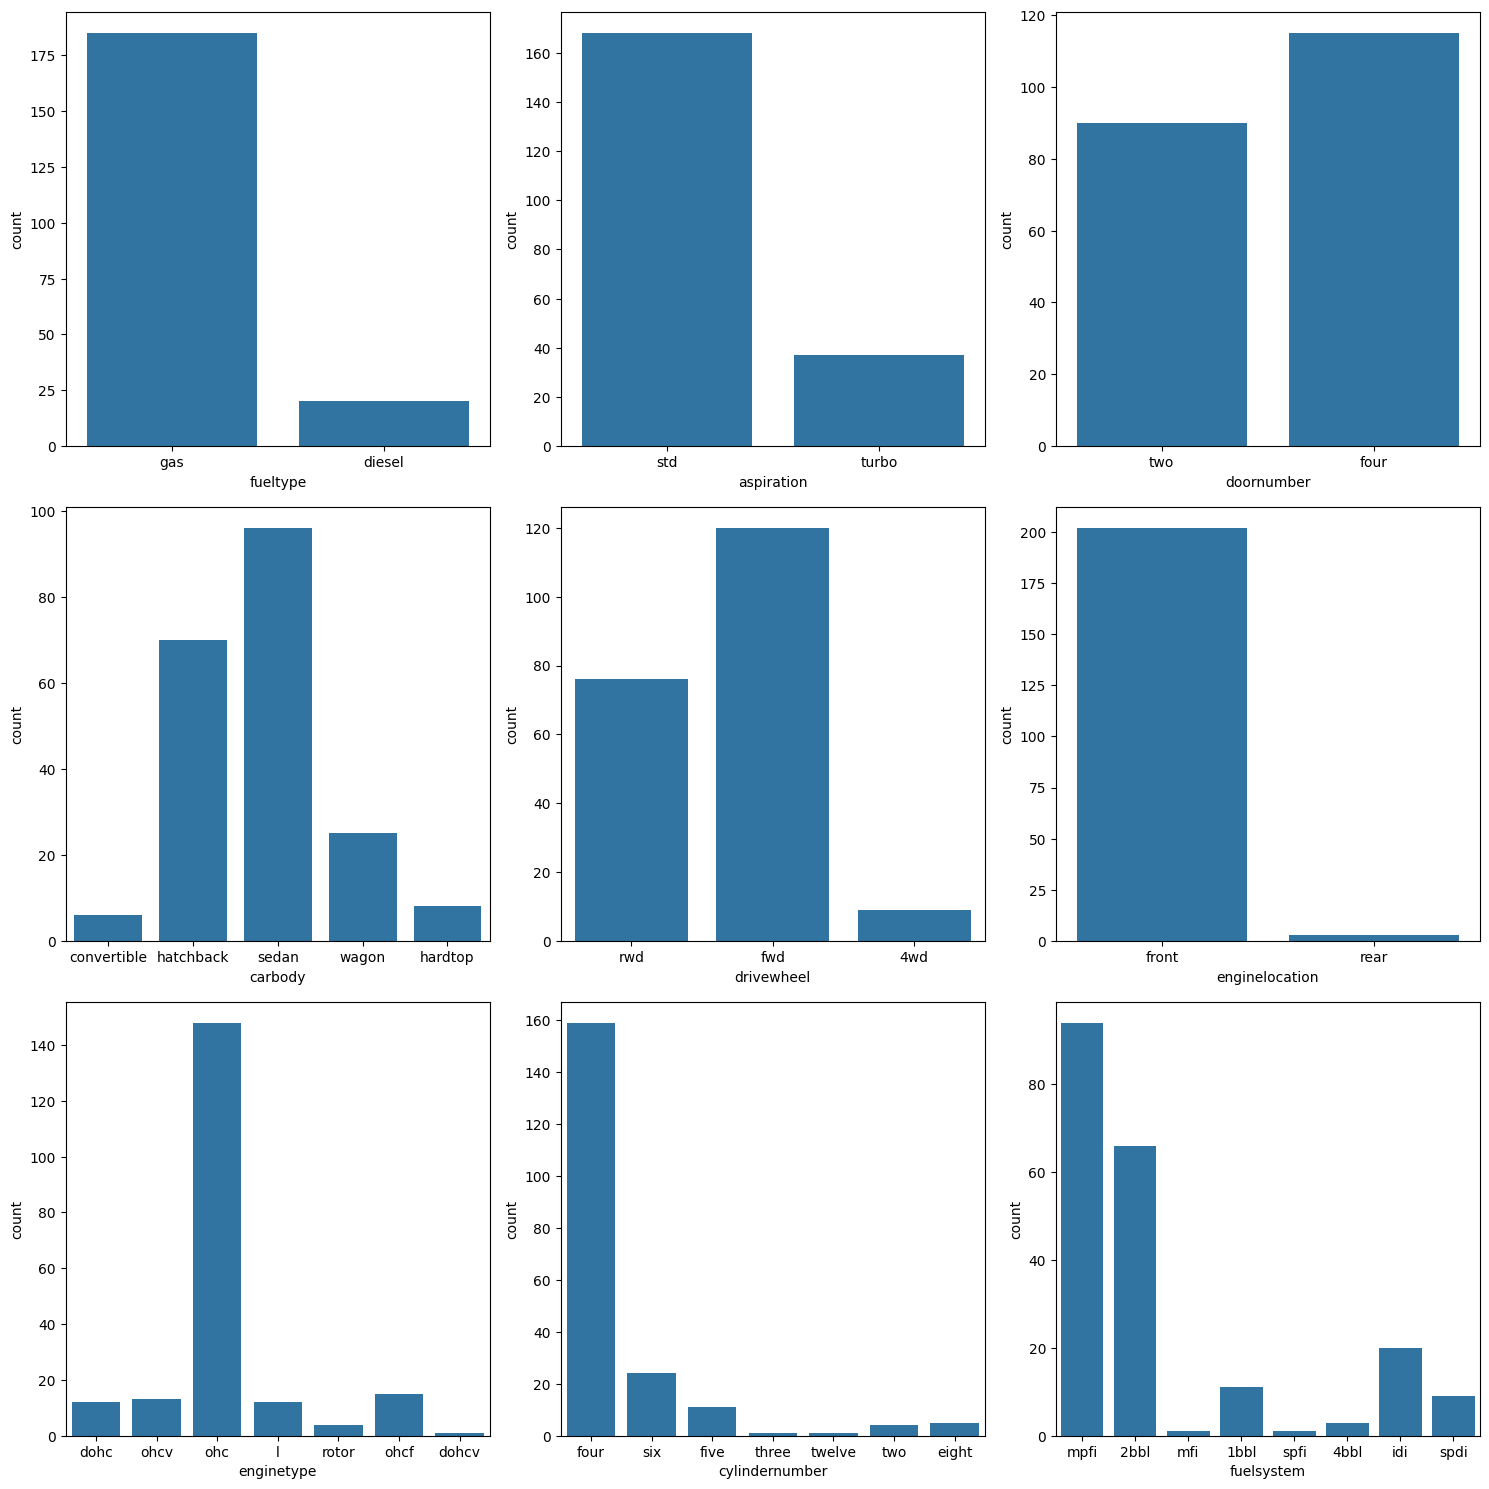

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,15))
for idx,col_name in enumerate(columns_object):
    plt.subplot(3,3,idx+1)
    sns.countplot(x=df.loc[:,col_name])
plt.tight_layout()
plt.show()

⭕ Reemplazar los datos de las columnas `cylindernumber` y `doornumber` con número. Las convertimos a variables numéricas

In [ ]:
cols = ['cylindernumber','doornumber']
replacing_dict = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}

for col in cols:
    df[col].replace(replacing_dict,inplace=True)
df

<ipython-input-12-1f5456750a04>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(replacing_dict,inplace=True)
<ipython-input-12-1f5456750a04>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace(replacing_dict,inplace=True)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Inspeccionemos las relaciones entre las variables (features) y el precio.

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight']


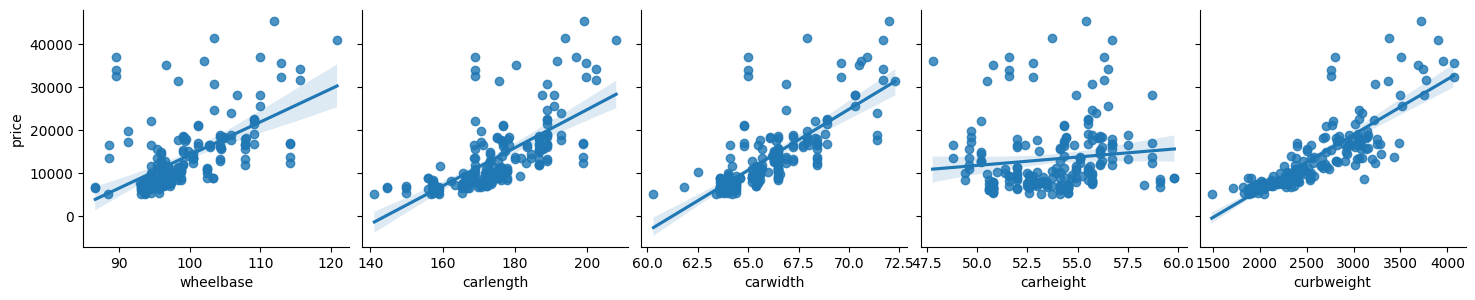

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.columns.to_list()[7:12])
sns.pairplot(df, x_vars=df.columns.to_list()[7:12], y_vars='price', height=3, aspect=1, kind='reg')
plt.show()

Separamos la variable de salida y preparamos las variables predictoras. Recordemos la convención de usar `y` para el vector de valores/etiquetas.

In [ ]:
y = df['price'].values
print(y.shape)

(205,)


Quitamos la columna `pice` del dataframe

In [ ]:
df.drop(columns='price',inplace=True)

Hacemos la codificación *one-hot* para las variables categóricas

In [ ]:
X_df = pd.get_dummies(df,dtype=int)
X_df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


Definimos la matriz de features. La convención es usar `X`:

In [ ]:
X = X_df.values
print(X.shape)

(205, 45)


In [ ]:
X[:3,:]

array([[3.000e+00, 2.000e+00, 8.860e+01, 1.688e+02, 6.410e+01, 4.880e+01,
        2.548e+03, 4.000e+00, 1.300e+02, 3.470e+00, 2.680e+00, 9.000e+00,
        1.110e+02, 5.000e+03, 2.100e+01, 2.700e+01, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00],
       [3.000e+00, 2.000e+00, 8.860e+01, 1.688e+02, 6.410e+01, 4.880e+01,
        2.548e+03, 4.000e+00, 1.300e+02, 3.470e+00, 2.680e+00, 9.000e+00,
        1.110e+02, 5.000e+03, 2.100e+01, 2.700e+01, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+

Dividimos los datos en entrenamiento (train) y prueba (test) con una proporción 80%/20%.

**¡Cuidado con el data leakage!**

![alt text](https://drive.google.com/uc?id=1S9KVyZbkiciIEeC7cLi-epa62gfFM0pi )

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=4595)

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((164, 45), (164,))
Prueba: ((41, 45), (41,))


Es recomendable **escalar las características antes de realizar la selección de variables**. Esto se debe a que muchos métodos de selección de características, como `VarianceThreshold` o `SelectKBest`, dependen de la magnitud o dispersión de los datos. **Si no se escalan primero, las características con valores más grandes pueden dominar el análisis solo por su escala, no por su relevancia real**.

Por lo tanto, el flujo ideal es:
1. Primero estandarizar los datos.
2. Luego aplicar el método de selección de características.

Hacemos normalización.

* [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#---- Esto es sólo para visualizar ----
print(X_train[:3,:5])

[[0.6        0.         0.24482759 0.14471545 0.30833333]
 [0.2        1.         0.57586207 0.54471545 0.35833333]
 [0.4        1.         0.47586207 0.6601626  0.51666667]]


In [ ]:
pd.DataFrame(X_train,columns=X_df.columns).describe()

Realicemos una selección de *features*.

* [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). Selecciona las variables (features) con varianza mayor que el umbral indicado.
* [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html). Selecciona las variables (features) que mejor expliquen la variable target (salida/etiqueta). **Cuidado con la función score que se usa**.

In [ ]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.feature_selection import f_regression

features = X_df.columns.to_list()

# ---- Si usamos VarianceThreshold: -----
# selector = VarianceThreshold(0.2)
# selector = selector.fit_transform(X_train)

# ---- Si usamos SelectKBest ------
selector = SelectKBest(score_func=f_regression, k=20)
X_train = selector.fit_transform(X_train,y_train)   # Entrenamos y transformamos el de entrenamiento

X_test = selector.transform(X_test)        # Sólo transformamos el de prueba

selected_idxs = selector.get_support(indices=True)
selected_features = [features[i] for i in selected_idxs]

print(f"Teníamos {X.shape[1]} variables originalmente, nos quedamos con {len(selector.get_feature_names_out())}")
print(f"Variables con las que nos quedamos:\n{selector.get_feature_names_out()}\n")
print(f"Índices de las variables con las que nos quedamos:\n{selected_idxs}")
print(f"Variables seleccionadas:\n{[selected_features]}\n")

Teníamos 45 variables originalmente, nos quedamos con 20
Variables con las que nos quedamos:
['x2' 'x3' 'x4' 'x6' 'x7' 'x8' 'x9' 'x12' 'x14' 'x15' 'x18' 'x19' 'x26'
 'x27' 'x28' 'x29' 'x33' 'x35' 'x38' 'x42']

Índices de las variables con las que nos quedamos:
[ 2  3  4  6  7  8  9 12 14 15 18 19 26 27 28 29 33 35 38 42]
Variables seleccionadas:
[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'aspiration_std', 'aspiration_turbo', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear', 'enginetype_ohc', 'enginetype_ohcv', 'fuelsystem_2bbl', 'fuelsystem_mpfi']]



### Entrenamiento



In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Veamos el coeficiente de determinación del desempeño en el **conjunto de entrenamiento**. Este es el coeficiente `R2`

In [ ]:
lr.score(X_train,y_train)

0.9301854589787873

Veamos cómo lo hace en el **conjunto de prueba**

In [ ]:
lr.score(X_test,y_test)

0.8858567207262616

### Predicciones

Predecimos usando las variables predictoras del conjunto de prueba

In [ ]:
y_pred_test = lr.predict(X_test)

Veamos cómo se ven las predicciones

In [ ]:
import numpy as np

print(f"Valores de prueba:\n{y_test[:5]}")
print(f"Valores predichos:\n{np.round(y_pred_test[:5],2)}")

Valores de prueba:
[45400. 35550.  6377.  7957.  7126.]
Valores predichos:
[20634.12 20540.15  5809.46  8720.2   7909.2 ]


Representemos gráficamente esta comparación

In [ ]:
y_pred_train = lr.predict(X_train)

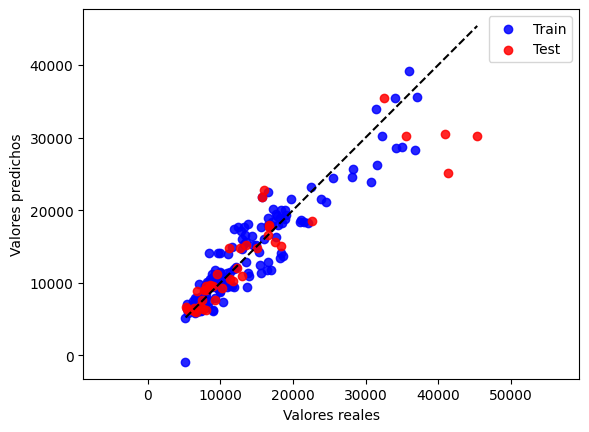

In [ ]:
xaxis = np.linspace(np.min(y_test),np.max(y_test),100)

plt.figure(dpi=100)
plt.scatter(y_train, y_pred_train, c='blue',alpha=0.85,label='Train')
plt.scatter(y_test, y_pred_test, c='red',alpha=0.85,label='Test')
plt.plot(xaxis,xaxis,'k--')  # La línea de referencia y_pred=y_real
plt.legend(loc='best')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.axis('equal')
plt.show()

Podemos usar otras métricas de rendimiento.

Más información: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print(f"R2 en la prueba: {lr.score(X_test,y_test)}")

print(f"MAE en el conjunto de prueba: {mean_absolute_error(y_test,y_pred_test)}")  # Esta es muy interpretativa
print(f"MSE en el conjunto de prueba: {mean_squared_error(y_test,y_pred_test)}")
print(f"MAPE en el conjunto de prueba: {mean_absolute_percentage_error(y_test,y_pred_test)}")

R2 en la prueba: 0.8858567207262616
MAE en el conjunto de prueba: 2234.6689492426253
MSE en el conjunto de prueba: 11944281.558281329
MAPE en el conjunto de prueba: 0.15300946275337465


También podemos comparar usando los valores de entrenamiento

In [ ]:
print(f"R2 en el entrenamiento: {lr.score(X_train,y_train)}")

print(f"MAE en el conjunto de entrenamiento: {mean_absolute_error(y_train,y_pred_train)}")  # Esta es muy interpretativa
print(f"MSE en el conjunto de entrenamiento: {mean_squared_error(y_train,y_pred_train)}")
print(f"MAPE en el conjunto de entrenamiento: {mean_absolute_percentage_error(y_train,y_pred_train)}")

R2 en el entrenamiento: 0.9301854589787873
MAE en el conjunto de entrenamiento: 1478.9548683577618
MSE en el conjunto de entrenamiento: 3692070.722965261
MAPE en el conjunto de entrenamiento: 0.13289564984575725


⚡ Nos podemos preguntar cómo es el efecto de la selección de features en el score o en las métricas:

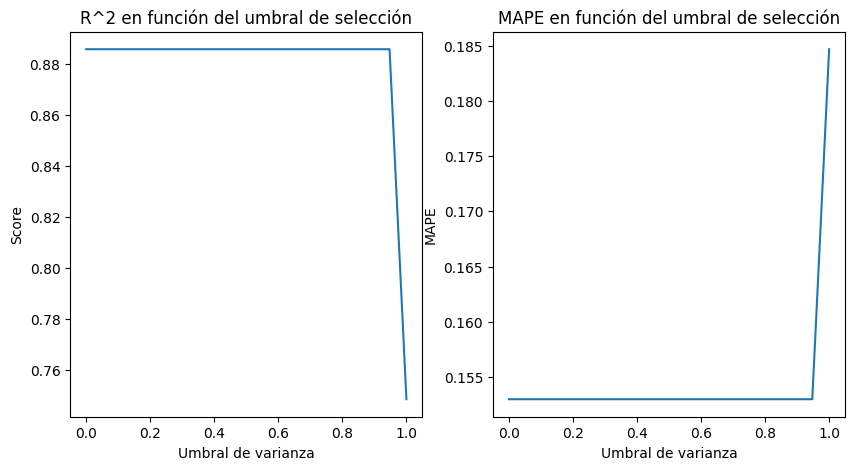

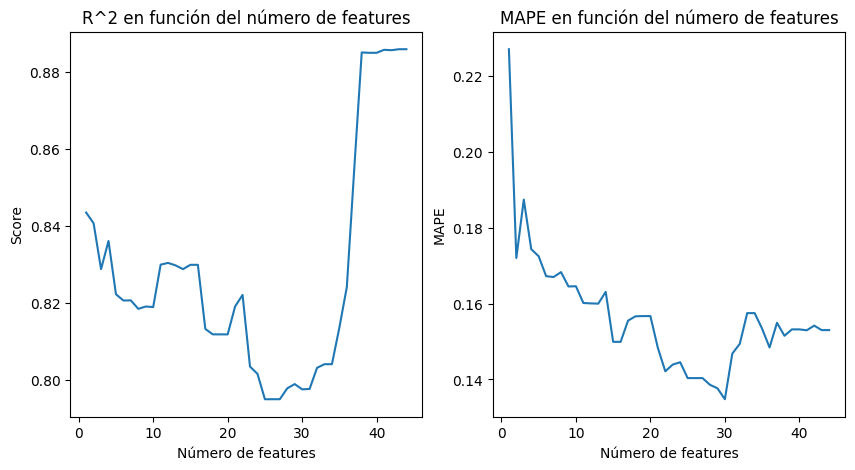

In [ ]:
# @title
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.feature_selection import f_regression

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=4595)
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

umbrales = np.linspace(0,1,num=20)
ks = list(range(1,X_train.shape[1]))
scores = []
mapes = []

for umbral in umbrales:
    selector = VarianceThreshold(umbral)
    X_train_sel = selector.fit_transform(X_train_scl)
    X_test_sel = selector.transform(X_test_scl)
    lr = LinearRegression()
    lr.fit(X_train_sel, y_train)
    y_pred_0 = lr.predict(X_test_sel)
    scores.append(lr.score(X_test_sel,y_test))
    mapes.append(mean_absolute_percentage_error(y_test,y_pred_0))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("R^2 en función del umbral de selección")
plt.plot(umbrales,scores)
plt.xlabel("Umbral de varianza")
plt.ylabel("Score")
plt.subplot(1,2,2)
plt.title("MAPE en función del umbral de selección")
plt.plot(umbrales,mapes)
plt.xlabel("Umbral de varianza")
plt.ylabel("MAPE")
plt.show()

scores = []
mapes = []
for k in ks:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_sel = selector.fit_transform(X_train_scl, y_train)
    X_test_sel = selector.transform(X_test_scl)
    lr = LinearRegression()
    lr.fit(X_train_sel, y_train)
    y_pred = lr.predict(X_test_sel)
    scores.append(lr.score(X_test_sel,y_test))
    mapes.append(mean_absolute_percentage_error(y_test,y_pred))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("R^2 en función del número de features")
plt.plot(ks,scores)
plt.xlabel("Número de features")
plt.ylabel("Score")
plt.subplot(1,2,2)
plt.title("MAPE en función del número de features")
plt.plot(ks,mapes)
plt.xlabel("Número de features")
plt.ylabel("MAPE")
plt.show()

### Interpretación de los resultados

Recuerda que el objetivo de la ciencia de datos es proporcionar información para la toma de decisiones a partir del exploración y modelaje de los datos.

En este caso, ¿qué variables son más importantes para determinar el precio de un vehículo?

Podemos acceder a los coeficientes de la regresión. Vemos que hay un coeficiente por cada feature.

In [ ]:
print(f"Número de coeficientes: {lr.coef_.shape}")
print(f"Número de features: {X_train.shape[1]}")
print(lr.coef_)

Número de coeficientes: (45,)
Número de features: 45
[  3224.45378518    555.25965512   5047.62340177  -3512.48026025
   6676.77095054   2613.72668602  11712.04579504  -1087.09191693
  32482.93170169  -7506.99072291 -10243.71000772 -18430.92000574
   5397.40471027   3219.16621886   -473.42123135   5579.10507024
   5295.5601553   -5295.5601553    -600.94874528    600.94874528
   2901.15643868   -906.91700196   -503.40414595    102.63775843
  -1593.4730492    -847.82644474   -417.61501088   1265.44145562
  -5703.18900817   5703.18900817  -1507.28025957   2152.38477009
  -4267.0662221     616.53598834   -153.97224518  -4609.71865329
   7769.11662171    657.54960285    250.11283367   -780.49167676
   5295.5601553   -2550.63463087    178.35725495  -2535.53382831
   -514.91971084]


Los organizamos con el nombre de cada *feature*

In [ ]:
# Armemos un dataframe con los coeficientes y features
# coefs_df = pd.DataFrame(lr.coef_.reshape(1,-1),columns=X_df.iloc[:,selected_idxs].columns).T

coefs_df = pd.DataFrame(lr.coef_.reshape(1,-1),columns=X_df.columns).T
coefs_df.reset_index(inplace=True)
coefs_df.columns = ['Feature','Coeficiente']
coefs_df

,Feature,Coeficiente
0,symboling,3224.453785
1,doornumber,555.259655
2,wheelbase,5047.623402
3,carlength,-3512.480260
4,carwidth,6676.770951
5,carheight,2613.726686
6,curbweight,11712.045795
7,cylindernumber,-1087.091917
8,enginesize,32482.931702
9,boreratio,-7506.990723


Veamos cuales tienen más peso

In [ ]:
coefs_df.sort_values(by='Coeficiente',ascending=False)

,Feature,Coeficiente
8,enginesize,32482.931702
6,curbweight,11712.045795
36,enginetype_rotor,7769.116622
4,carwidth,6676.770951
29,enginelocation_rear,5703.189008
15,highwaympg,5579.105070
12,horsepower,5397.404710
16,fueltype_diesel,5295.560155
40,fuelsystem_idi,5295.560155
2,wheelbase,5047.623402


### ⭕ **Ejercicio importante por tu cuenta**

Prueba el modelo anterior con cada una de las siguientes modificaciones. En cada una obten las métricas MAPE y MAE en el conjunto de prueba y obten las 3 variables con más importancia (usando los coeficientes).

1. No uses re-escalamiento
2. No hagas selección de features
3. Selecciona algunas features *intuitivamente*

⚡ Una pregunta que surge con frecuencia se refiere a la incertidumbre acerca de los parámetros del modelo, ya que estos también son variables aleatorias.

En general, Scikit-Learn no proporciona herramientas para obtener conclusiones acerca de los parámetros internos del modelo: la interpretación de los parámetros del modelo es mucho más una *pregunta de modelaje estadístico* que una pregunta de *aprendizaje automático*.
* El aprendizaje automático se centra más la *predicción*.
* El modelado estadístico se centra más en el estudio de la relación entre variables independientes y dependientes.

No obstante, si se desea profundizar en el significado de los parámetros del modelo, hay herramientas como las incluidas en el [paquete de Statsmodels de Python](http://statsmodels.sourceforge.net/).

In [ ]:
import statsmodels.api as sm

X_train_1 = sm.add_constant(X_train)
X_train_1_df = pd.DataFrame(X_train_1, columns=['const']+X_df.columns.to_list())
display(X_train_1_df.head())
lr_sm = sm.OLS(y_train, X_train_1_df)
results = lr_sm.fit()
print(results.summary())

,const,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.6,0.0,0.244828,0.144715,0.308333,0.400000,0.181536,0.2,0.116981,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.2,1.0,0.575862,0.544715,0.358333,1.000000,0.406129,0.2,0.230189,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.4,1.0,0.475862,0.660163,0.516667,0.608333,0.623351,0.4,0.452830,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.4,1.0,0.365517,0.502439,0.425000,0.391667,0.272304,0.2,0.177358,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.6,0.0,0.272414,0.489431,0.433333,0.383333,0.517843,0.4,0.343396,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     45.37
Date:                Sat, 10 May 2025   Prob (F-statistic):           9.18e-57
Time:                        16:22:54   Log-Likelihood:                -1472.7
No. Observations:                 164   AIC:                             3021.
Df Residuals:                     126   BIC:                             3139.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3514.4469 

In [ ]:
# Recordar que el R2 ya lo teníamos
print(f"R2 en el entrenamiento: {lr.score(X_train,y_train)}")

**Algunas observaciones**

* `R-squared` nos dice que nuestro modelo explica 93% del cambio en la variable dependiente (el precio del automovil).
* `Adj. R-squared` ajusta el coeficiente `R-squared` tomando en cuenta el número de variables (features).
* Los p-values `P>|t|` nos dice qué tan probable es que el coeficiente de la población haya sido medido por azar. Es decir, pone a prueba la hipótesis nula de que la variable independiente no tiene correlación con la variable dependiente. Hay dos escenarios:
    * El valor es superior al nivel de significancia, no hay asociación entre los cambios en la variable independiente y los cambios en la variable dependiente. En otras palabras, no hay pruebas suficientes para concluir que existe un efecto a nivel de población.
    * Si el valor p de una variable es inferior al nivel de significancia, los datos de la muestra proporcionan pruebas suficientes para rechazar la hipótesis nula de toda la población. Sus datos favorecen la hipótesis de que existe una correlación distinta de cero. Los cambios en la variable independiente están asociados a cambios en la variable dependiente a nivel poblacional. Esta variable es estadísticamente significativa y probablemente merezca la pena añadirla a su modelo de regresión.

## Ejemplo 4: Regresión con Regularización

Recordar que la regularización es una técnica de regresión lineal que penaliza la magnitud de los coeficientes de la regresión. Los coeficientes minimizan una suma de cuadrados residual penalizada:

$$\text{min}_w \|Xw - y \|^2+α\|w\|^p$$

El parámetro de complejidad $\alpha>0$ controla la cantidad de contracción: cuanto mayor sea el valor de $\alpha$, mayor será la cantidad de contracción.

Hay tres tipos de regularización en la regresión:

* [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html): $p=2$.
* [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html): $p=1$.
* [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet): Combina ambas anteriores.

En esto caso, sólo experimentaremos con la primera y veremos:

1. El efecto en la norma de los coeficientes.
2. El efecto en el rendimiento de la tarea de regresión.

En notebooks posteriores analizaremos un poco más a fondo la regularización.

Repetimos el procedimiento, ya de forma más compacta:

In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/cars-prices.csv'
df = pd.read_csv(url)
df.drop(columns=['car_ID','CarName'],inplace=True)
cols = ['cylindernumber','doornumber']
replacing_dict = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}

for col in cols:
    df[col].replace(replacing_dict,inplace=True)

y = df['price'].values
df.drop(columns='price',inplace=True)
X_df = pd.get_dummies(df,drop_first=True)
X = X_df.values

print(f"Features: {X.shape}")
print(f"Etiquetas: {y.shape}")

df

Features: (205, 38)
Etiquetas: (205,)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,4,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,4,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,6,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,6,145,idi,3.01,3.40,23.0,106,4800,26,27


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=4595)

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((164, 38), (164,))
Prueba: ((41, 38), (41,))


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

⭕ No hagamos selección de features para notar el efecto de la regularización.

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# lr = Ridge(alpha=1)
# lr = Lasso(alpha=4)
lr = ElasticNet(alpha=1,l1_ratio=0.5)
lr.fit(X_train,y_train)

print(f"Score R^2 de entrenamiento: {lr.score(X_train,y_train)}")
print(f"Score R^2 de prueba: {lr.score(X_test,y_test)}")

y_pred = lr.predict(X_test)
print(f"\nMAE en prueba: {mean_absolute_error(y_test,y_pred)}")
print(f"MAPE en prueba: {mean_absolute_percentage_error(y_test,y_pred)}")

Score R^2 de entrenamiento: 0.8760117576666043
Score R^2 de prueba: 0.8157595794416446

MAE en prueba: 2572.8907572201542
MAPE en prueba: 0.15656869814157906


In [ ]:
columns = X_df.columns.to_list()

coefs_df = pd.DataFrame(np.round(lr.coef_.reshape(1,-1),4),columns=columns).T
coefs_df.reset_index(inplace=True)
coefs_df.columns = ['Feature','Coeficiente']
coefs_df.sort_values(by='Coeficiente',ascending=False, inplace=True)
coefs_df

,Feature,Coeficiente
8,enginesize,1088.9661
7,cylindernumber,1086.2231
24,enginelocation_rear,1064.7669
12,horsepower,895.9297
6,curbweight,880.6399
4,carwidth,835.2911
23,drivewheel_rwd,585.3263
2,wheelbase,372.8162
0,symboling,244.2853
3,carlength,235.5832


¿Qué efecto tiene el parámetro $\alpha$ sobre la magnitud de los coeficientes?

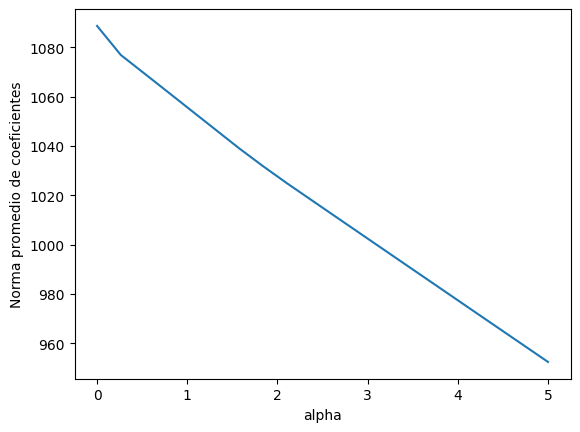

In [ ]:
import matplotlib.pyplot as plt

alphas = np.linspace(0,5,num=20)
normas = []

for alpha in alphas:
    lr = Lasso(alpha=alpha)
    lr.fit(X_train,y_train)
    normas.append(np.mean(np.abs(lr.coef_)))

plt.figure()
plt.plot(alphas,normas)
plt.xlabel("alpha")
plt.ylabel("Norma promedio de coeficientes")
plt.show()

¿Qué efecto tiene el parámetro $\alpha$ en el score?

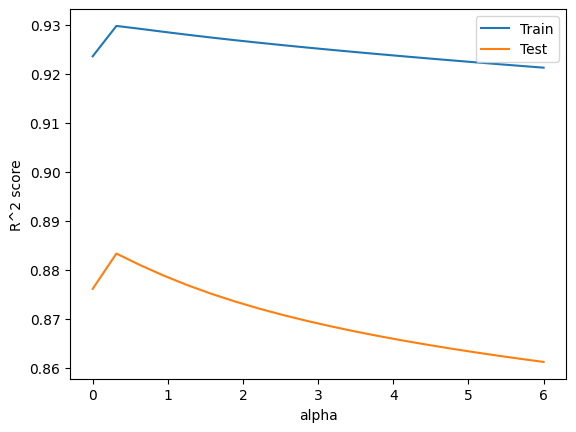

In [ ]:
import matplotlib.pyplot as plt

alphas = np.linspace(0,6,num=20)
train_scores = []
test_scores = []

for alpha in alphas:
    lr = Ridge(alpha=alpha)
    lr.fit(X_train,y_train)
    train_scores.append(lr.score(X_train,y_train))
    test_scores.append(lr.score(X_test,y_test))

plt.figure()
plt.plot(alphas,train_scores,label="Train")
plt.plot(alphas,test_scores,label="Test")
plt.xlabel("alpha")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

Como podemos ver, en este ejemplo concreto, la regularización no beneficia al problema en cuestión de la métrica de rendimiento.

#⭕ Práctica

Usaremos un dataset sobre publicidad. Este dataset consta de 200 registros, cada registro consta de las variables.

* TV: dólares de publicidad gastados en TV para un solo producto en un mercado determinado (en miles de dólares)
* Radio: inversión publicitaria en radio
* Newspaper: inversión publicitaria en periódicos
* Sales: ventas de un solo producto en un mercado determinado (en miles de unidades).


In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/advertising.csv'
sales_df = pd.read_csv(url,index_col=0)
sales_df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


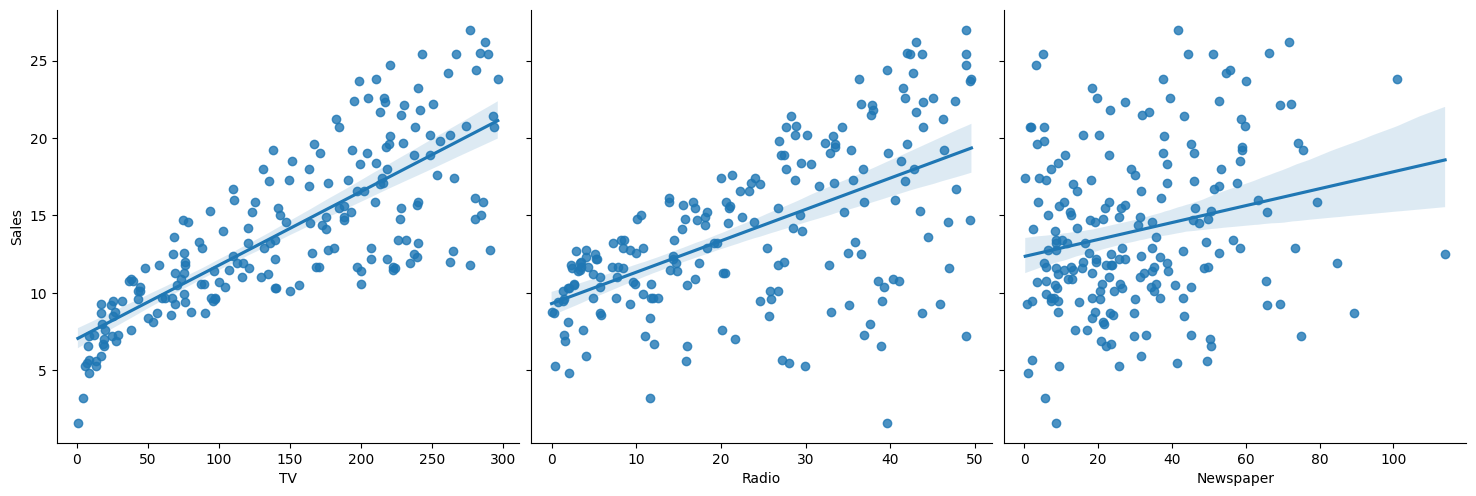

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=1, kind='reg')
plt.show()

Objetivos:

1. Entrenar al menos dos modelo de regresión lineal (regresión lineal y uno con regularización) usando el 85% de las instancias, separar el resto para prueba. **No olvides el preprocesamiento**, **cuidado con el data leakage**.
2. Reportar las métricas de rendimiento MAE, MSE en las predicciones con el conjunto de prueba solamente.
3. Con base en la métrica de rendimiento MAE, escoge el mejor modelo de regresión lineal. Es decir, ¿cuál es el menor MAE que puedes obtener en el conjunto de prueba? Junto con este número, reporta los parámetros y la combinación de técnicas que usaste.

Recuerdas las opciones que tienes en cada uno de los pasos:

* Preprocesamiento:
    * Escalamiento: MinMaxScaler, StandardScaler.
    * Selección de features: VarianceThreshold, SelectKBest, SequentialFeatureSelector, ...
* Algoritmo de Regresión: Regresión Lineal, Regresión Lasso, Ridge, ElasticNet.

Considera las siguientes situaciones en el preprocesamiento:

* ¿Hay valores faltantes? En caso de que sí, recuerda que tienes dos opciones: remover estas instancias o hacer imputación.
* ¿Cuál es el rango de las 3 variables? ¿tienen magnitudes muy diferentes?
* ¿Hay alguna variable que consideres que no es muy relevante?
* Realiza la(s) técnica(s) de normalización que consideres necesario: selección de features, normalización.




### ✅ Práctica resuelta

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---- SEPARACIÓN DE X Y Y ---
X = sales_df.drop(columns='Sales').values
y = sales_df['Sales'].values

# --- DIVISIÓN EN TRAIN/TEST ---
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.85, random_state=295)

# --- ESCALAMIENTO ---
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- INICIALIZACIÓN Y ENTRENAMIENTO DEL MODELO ----

lr = LinearRegression()
# lr = Lasso(alpha=1)

lr.fit(X_train,y_train)

# ------ EVALUACIÓN -----
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

print(f"Score R^2 de entrenamiento: {lr.score(X_train,y_train)}")
print(f"MAE en entrenamiento: {mean_absolute_error(y_train,y_train_pred)}")
print(f"MSE en entrenamiento: {mean_squared_error(y_train,y_train_pred)}")
print(f"MAE en prueba: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE en prueba: {mean_squared_error(y_test,y_pred)}")


# ----- INFORMACIÓN DE LOS COEFICIENTES ----------
columns = sales_df.drop(columns='Sales').columns.to_list()
coefs_df = pd.DataFrame(np.round(lr.coef_.reshape(1,-1),4),columns=columns).T
coefs_df.reset_index(inplace=True)
coefs_df.columns = ['Feature','Coeficiente']
coefs_df.sort_values(by='Coeficiente',ascending=False, inplace=True)
coefs_df

Score R^2 de entrenamiento: 0.8997720272391273
MAE en entrenamiento: 1.287295780931655
MSE en entrenamiento: 2.9779264992900583
MAE en prueba: 1.0842352724733384
MSE en prueba: 1.7320091461002165


,Feature,Coeficiente
0,TV,13.8026
1,Radio,9.4287
2,Newspaper,-0.1735
